# Linear Regression *y = wx + b*
Try to find a function that can predict the temperature based on salnty.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sympy import diff, symbols, lambdify
from sympy.abc import x, y

In [2]:
data = pd.read_csv('/Users/yuwenchen/Desktop/2190_3685_bundle_archive/bottle.csv')
data = pd.DataFrame(data)

/Users/yuwenchen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning
Simply drop the null value.

In [4]:
# predict the water temperature based on salinity
att = data[['T_degC', 'Salnty']]

# remove NAN values
att = att.dropna()

# reset the index
att = att.reset_index(drop=True)

# Normalization
normalize the data between 0 - 1

In [5]:
# Only derive 1000 sample as training data
batchSize = 1000

In [6]:
# 0-1 normalization
def normalization (x):
    return (x - min(x)) / (max(x) - min(x))

In [7]:
x_data = normalization(att['Salnty'].loc[:batchSize]).tolist()
y_data = normalization(att['T_degC'].loc[:batchSize]).tolist()

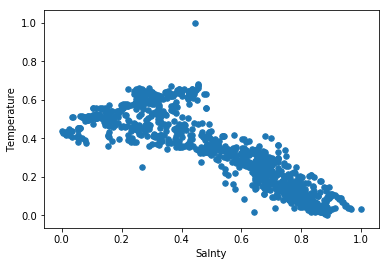

In [8]:
plt.scatter(x_data, y_data, s = 30)
plt.xlabel('Salnty')
plt.ylabel('Temperature')
plt.show()

# Training Phase
Use Gradient Descent to train the linear model *y = wx + b*.
Use Adagrad for learning rate.

In [9]:
b = 1.0 # initial b
w = 0.0 # initial w
lr = 0.001 # learning rate
iteration = 100000

# store initial vlaues for plotting
b_history = []
w_history = []
loss_history = []

# set the learning rate be different
lr_b = 0
lr_w = 0

x, y, w1, b1 = symbols('x, y, w1, b1')
lossf = (y - (b1 + w1*x))**2
diff_b = lambdify([x, y, w1, b1], diff(lossf, b1))
diff_w = lambdify([x, y, w1, b1], diff(lossf, w1))

# interation start, use gradient descent to find the best b and w that can let the output be the least 
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    loss = 0.0

    for n in range(len(x_data)):
        
        # compute the loss
        loss = loss + (y_data[n] - (b + w*x_data[n]))**2
        
        # compute ∂L/∂w 
        b_grad = b_grad + diff_b(x_data[n], y_data[n], w, b)
        
        # compute ∂L/∂b
        w_grad = w_grad + diff_w(x_data[n], y_data[n], w, b)
    
    # use Adagrad for leanring rate
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2
    
    b = b - lr/np.sqrt(lr_b) * b_grad
    w = w - lr/np.sqrt(lr_w) * w_grad
    
    if i % 1000 == 0:
        print("loss:", loss)
    # print(b, w, loss)
    
    # for plotting
    loss_history.append(loss)
    b_history.append(b)
    w_history.append(w)

loss: 476.95190177316647
loss: 359.2111251740403
loss: 316.1434864155504
loss: 285.71146756598637
loss: 261.7625496750297
loss: 241.91901314293202
loss: 224.9642052336849
loss: 210.17704257997272
loss: 197.08879259103549
loss: 185.3746399919694
loss: 174.79865498495815
loss: 165.18316372455948
loss: 156.39047449323945
loss: 148.3113665402173
loss: 140.85751449408946
loss: 133.9563197955439
loss: 127.54727610405446
loss: 121.57934676719054
loss: 116.009030085017
loss: 110.79890412626037
loss: 105.9165134712157
loss: 101.33350461159166
loss: 97.02494537760677
loss: 92.96878271354377
loss: 89.1454059395096
loss: 85.53729147667424
loss: 82.12871121873512
loss: 78.90549115935998
loss: 75.85481009016966
loss: 72.96503053535939
loss: 70.22555583573406
loss: 67.62670860743734
loss: 65.15962679713095
loss: 62.81617431952623
loss: 60.5888638544427
loss: 58.47078984195904
loss: 56.455570077229815
loss: 54.53729459415267
loss: 52.71048075667134
loss: 50.97003366090404
loss: 49.31121110036125
loss:

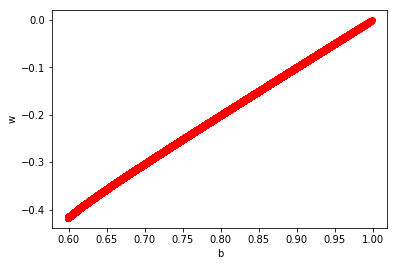

In [10]:
plt.plot(b_history, w_history, 'o-', color = 'red')
plt.xlabel('b')
plt.ylabel('w')
plt.show()

# Visualize the Loss

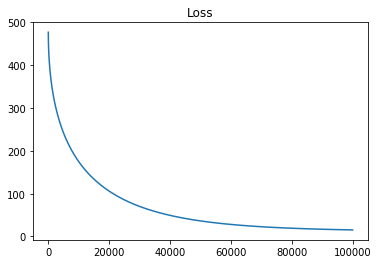

In [11]:
# visualize the loss
fig = plt.figure()
plt.title("Loss")
plt.plot(range(0,iteration), loss_history[0:iteration])    
plt.show()

# Plot the Result with normalization
Green line is the intial function. Red line is the learned function that has the minimum loss I got.

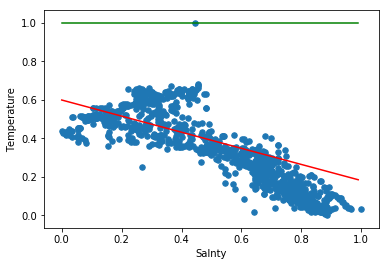

In [12]:
plt.scatter(x_data, y_data, s = 30)
plt.xlabel('Salnty')
plt.ylabel('Temperature')

x_ = np.arange(min(x_data), max(x_data), 0.01)
y_ = w*x_ + b

# predicted fucntion 
plt.plot(x_, y_, color = 'red')

# initial function
nor_y = 0*x_ + 1
plt.plot(x_, nor_y, color = "green")

plt.show()

# Denomalize *w* and *b*

In [13]:
def denomalization(x, y, w, b):
    A = max(y)-min(y)
    B = max(x)-min(x)
    den_w = (w*A)/B
    den_b = -1*((A*w*min(x))/B)+(A*b) + min(y)
    return den_w, den_b

In [14]:
x_output = att['Salnty'].loc[:batchSize].tolist()
y_output = att['T_degC'].loc[:batchSize].tolist()

res_w, res_b = denomalization(x_output, y_output, w, b)
res_w, res_b

(-3.510566789403081, 127.49876486738097)

# Plot the Result
Green line is the intial function.
Red line is the learned function that has the minimum loss I got.

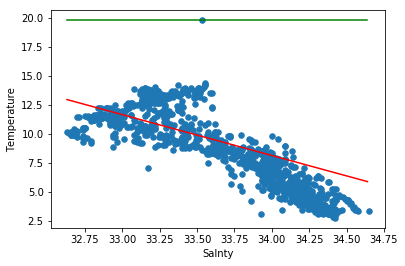

In [15]:
plt.scatter(x_output, y_output, s = 30)
plt.xlabel('Salnty')
plt.ylabel('Temperature')

x_ = np.arange(min(x_output), max(x_output), 0.01)
y_ = res_w*x_ + res_b

# predicted fucntion 
plt.plot(x_, y_, color = 'red')

# intial function
ori_w, ori_b = denomalization(x_output, y_output, 0.0, 1.0)
initial_y = ori_w*x_ + ori_b
plt.plot(x_, initial_y, color = "green")
plt.show()